# Libraries

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
# Do you want plot with latex font format? Use the cell bellow:
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
import numpy as np
import pandas as pd

# Dataset upload or create

For simplicity we use a random variable concept to create a dataset.

In [60]:
data = [np.random.normal(loc=i*0.2, scale=1, size=100) for i in range(10)]

# Chart

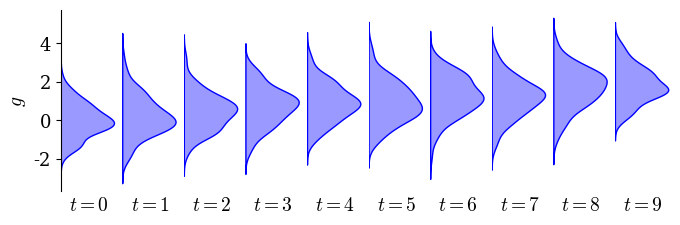

In [61]:
### Figure name and DPI
dpi = 600
name = 'kde_histogram_multiples'

### Chart dimensions
b_cm_individual = 2      
h_cm = 6                 
inches_to_cm = 1 / 2.54

n_plots = 10 
b_input_total = (b_cm_individual * n_plots) * inches_to_cm
h_input = h_cm * inches_to_cm

### Axis and labels
label_y = '$g$'
size_label = 14
color_label = 'black'
size_axis = 13
color_axis = 'black'
color = 'blue'
alpha = 0.4

### Figure
fig, axes = plt.subplots(nrows=1, ncols=n_plots, sharey=True, figsize=(b_input_total, h_input))

### Space between plots
plt.subplots_adjust(wspace=0.1) 

### Loop
for i, ax in enumerate(axes):
    
    ### Plot
    current_data = data[i]
    sns.kdeplot(y=current_data, fill=True, alpha=alpha, ax=ax, color=color)
    
    # Configurações gerais (Fonte, Cor)
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    
    # Label X
    ax.set_xlabel(f'$t={i}$', fontsize=size_label, color=color_label)
    
    # Remove ticks e números do eixo X (como você pediu antes)
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    # Remove bordas padrão (Topo, Direita, Baixo)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # --- AQUI ESTÁ A MÁGICA PARA REMOVER O EIXO Y DOS OUTROS ---
    if i == 0:
        # Primeiro gráfico: Mantém a linha da esquerda e o Label Y
        ax.spines['left'].set_visible(True)
        ax.set_ylabel(label_y, fontsize=size_label, color=color_label)
    else:
        # Do segundo em diante:
        ax.spines['left'].set_visible(False)   # Remove a linha vertical
        ax.tick_params(axis='y', left=False)   # Remove os tracinhos (ticks) da esquerda
        ax.set_ylabel('')                      # Remove o label
        
### Save and Show
fig.savefig(f'{name}.png', dpi=dpi, bbox_inches='tight')
plt.show()